In [477]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

In [478]:
#importing the movies dataset
dataset_movies = 'C:\\Users\\Good\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\movies.dat'

In [479]:
#importing the users dataset
dataset_users = 'C:\\Users\\Good\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\users.dat'

In [480]:
#importing the ratings dataset
dataset_ratings = 'C:\\Users\\Good\\Data-Science-with-Python-Project-One-master\\Data science with Python 1\\ratings.dat'

In [481]:
database_movies = ['movieId', 'title', 'genres']
database_users = ['userId', 'Gender','Age', 'Occupation','Zip-code']
database_ratings = ['userId', 'movieId', 'rating', 'timestamp']

In [482]:
df_movies = pd.read_csv(dataset_movies, sep="::", engine='python', header=None, names=database_movies)
df_users = pd.read_csv(dataset_users, sep="::", engine='python', header=None, names=database_users)
df_ratings = pd.read_csv(dataset_ratings, sep="::", engine='python', header=None, names=database_ratings)

In [483]:
# Creating the Master Dataset
df_movieid = pd.merge (df_movies, df_ratings)

In [484]:
print(df_movieid.columns)

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')


In [485]:
Master_Data = pd.merge(df_movieid, df_users)

In [486]:
print(Master_Data.columns)

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')


In [487]:
Master_Data.head()

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


# Exploring the dataset

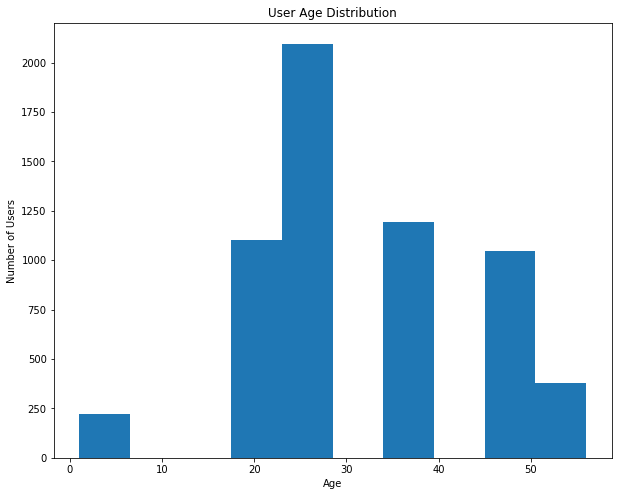

In [488]:
#Visualize User Age Distribution
plt.figure(figsize=(10,8))
df_users.Age.plot.hist()
plt.title("User Age Distribution")
plt.ylabel('Number of Users')
plt.xlabel('Age');

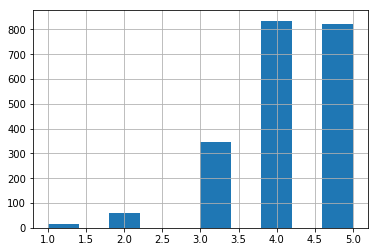

In [489]:
#User rating of the movie “Toy Story”
Master_Data[Master_Data['title'] == 'Toy Story (1995)'].rating.hist();

In [490]:
Master_Data[Master_Data['title'] == 'Toy Story (1995)'].rating.head().mean()

4.6

In [491]:
#Top 25 movies by viewership rating
Master_Data.groupby('title').size().sort_values(ascending=False)[:25]

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [492]:
Master_Data.groupby('title')['rating'].mean().sort_values(ascending=False)[:25]

title
Gate of Heavenly Peace, The (1995)                                     5.000000
Lured (1947)                                                           5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Smashing Time (1967)                                                   5.000000
Follow the Bitch (1998)                                                5.000000
Song of Freedom (1936)                                                 5.000000
Bittersweet Motel (2000)                                               5.000000
Baby, The (1973)                                                       5.000000
One Little Indian (1973)                                               5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [493]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
Master_Data[Master_Data['userId']==2696]

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


# Feature Engineering

In [494]:
# Find out all the unique genres 
unique_genre=Master_Data['genres'].unique().tolist()


In [495]:
Master_Data['genres'].nunique()

301

In [496]:
unique_genre

["Animation|Children's|Comedy",
 "Animation|Children's|Musical|Romance",
 'Drama',
 'Action|Adventure|Fantasy|Sci-Fi',
 'Drama|War',
 "Children's|Drama",
 "Animation|Children's|Comedy|Musical",
 "Animation|Children's|Musical",
 'Crime|Drama|Thriller',
 'Animation',
 'Animation|Comedy|Thriller',
 'Musical|Romance',
 "Adventure|Children's|Drama|Musical",
 'Musical',
 "Children's|Comedy|Musical",
 "Children's|Drama|Fantasy|Sci-Fi",
 'Action|Adventure|Comedy|Romance',
 'Comedy|Sci-Fi',
 'Action|Adventure|Drama',
 "Adventure|Animation|Children's|Comedy|Musical",
 'Drama|Romance',
 "Animation|Children's",
 'Action|Drama|War',
 'Comedy',
 'Romance',
 'Action|Crime|Romance',
 'Thriller',
 'Comedy|Fantasy',
 'Comedy|Drama',
 "Children's|Comedy|Drama",
 'Drama|Musical',
 'Drama|Romance|War|Western',
 'Crime|Drama',
 'Action|Comedy|Western',
 'Action|Romance|Thriller',
 'Western',
 "Children's|Comedy",
 'Adventure|Drama|Western',
 'Comedy|Romance',
 'Comedy|Drama|Romance',
 'Drama|Romance|War',
 

In [497]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

genres_unique = pd.DataFrame(Master_Data.genres.str.split('|').tolist()).stack().unique()

In [498]:
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])

In [499]:
movies_genres_unique = Master_Data.join(Master_Data.genres.str.get_dummies('|'))


In [500]:
movies_genres_unique

,movieId,title,genres,userId,rating,timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
5,531,"Secret Garden, The (1993)",Children's|Drama,1,4,978302149,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
6,588,Aladdin (1992),Animation|Children's|Comedy|Musical,1,4,978824268,F,1,10,48067,...,0,0,0,1,0,0,0,0,0,0
7,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,1,4,978302268,F,1,10,48067,...,0,0,0,1,0,0,0,0,0,0
8,595,Beauty and the Beast (1991),Animation|Children's|Musical,1,5,978824268,F,1,10,48067,...,0,0,0,1,0,0,0,0,0,0
9,608,Fargo (1996),Crime|Drama|Thriller,1,4,978301398,F,1,10,48067,...,0,0,0,0,0,0,0,1,0,0


# Determine the features affecting the ratings of any particular movie.


In [501]:
#Calculating count rating of all movies
Master_Data.groupby('title')['rating'].count().sort_values(ascending=False).head

<bound method NDFrame.head of title
American Beauty (1999)                                                   3428
Star Wars: Episode IV - A New Hope (1977)                                2991
Star Wars: Episode V - The Empire Strikes Back (1980)                    2990
Star Wars: Episode VI - Return of the Jedi (1983)                        2883
Jurassic Park (1993)                                                     2672
Saving Private Ryan (1998)                                               2653
Terminator 2: Judgment Day (1991)                                        2649
Matrix, The (1999)                                                       2590
Back to the Future (1985)                                                2583
Silence of the Lambs, The (1991)                                         2578
Men in Black (1997)                                                      2538
Raiders of the Lost Ark (1981)                                           2514
Fargo (1996)                

In [502]:
# creating dataframe with 'rating' count values 
Ratings = pd.DataFrame(Master_Data.groupby('title')['rating'].mean())  
  
Ratings['number of ratings'] = pd.DataFrame(Master_Data.groupby('title')['rating'].count()) 
  
Ratings.head() 

,rating,number of ratings
title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


In [503]:
Rating_features = Master_Data.pivot_table(index ='userId', 
              columns ='title', values ='rating') 
  
Rating_features.head() 
  
Ratings.sort_values('number of ratings', ascending = False).head(25) 


,rating,number of ratings
title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
Saving Private Ryan (1998),4.337354,2653
Terminator 2: Judgment Day (1991),4.058513,2649
"Matrix, The (1999)",4.315830,2590
Back to the Future (1985),3.990321,2583


In [504]:
# analysing correlation for a particular movie 
user_ratings = Rating_features['American Beauty (1999)'] 
user_ratings.head() 

userId
1    NaN
2    4.0
3    4.0
4    NaN
5    4.0
Name: American Beauty (1999), dtype: float64

In [505]:
# analysing correlation with similar movies 
similar_movie = Rating_features.corrwith(user_ratings) 
corr_movie = pd.DataFrame(similar_movie, columns =['Correlation']) 
corr_movie.dropna(inplace =True) 
corr_movie.head() 

C:\Users\Good\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Good\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"$1,000,000 Duck (1971)",-0.193080
'Night Mother (1986),0.318625
'Til There Was You (1997),0.064574
"'burbs, The (1989)",0.142070
...And Justice for All (1979),0.182361


In [506]:
# Similar movies like American Beauty 
corr_movie.sort_values('Correlation', ascending = False).head(10) 
corr_movie = corr_movie.join(Ratings['number of ratings']) 

corr_movie.head() 

corr_movie[corr_movie['number of ratings']>100].sort_values('Correlation', ascending = False).head() 


,Correlation,number of ratings
title,,
American Beauty (1999),1.000000,3428
All the King's Men (1949),0.449530,119
"Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)",0.418774,117
Girlfight (2000),0.407817,127
Winnie the Pooh and the Blustery Day (1968),0.400987,221


In [511]:
#Develop an appropriate model to predict the movie ratings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

In [512]:
# creating train and test sets
X_sample = movies_genres_unique.sample(n=50000, random_state=0)
X_df = X_sample.drop(['rating','title','Gender','timestamp','Zip-code','genres'],axis=1)

In [513]:
Y_df = X_sample['rating']

In [514]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=0)

In [515]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
Y_predict = linreg.predict(x_test)

In [516]:
from sklearn import metrics

In [517]:
print('y_intercept:',linreg.intercept_)
print('beta coefficients:',linreg.coef_)
print('Mean Abs Error MSE:',metrics.mean_absolute_error(y_test,Y_predict))
print('Root Mean Sq Error RMSE:',np.sqrt(metrics.mean_squared_error(y_test,Y_predict)))
print('R2 Value:',metrics.r2_score(y_test,Y_predict))

y_intercept: 3.4593747979049496
beta coefficients: [-5.30130506e-05  6.17134965e-06  4.15196645e-03  8.94299544e-04
 -9.61176699e-02 -7.15443503e-03  4.18949939e-01 -3.48299458e-01
 -9.32607431e-03  6.11817309e-02  4.12517118e-01  2.21069762e-01
  7.55438791e-02  3.88440974e-01 -2.88323397e-01  1.11377358e-01
  1.58823640e-02 -1.83600986e-02 -1.74556810e-02  4.64051893e-02
  2.87735770e-01  1.37221580e-01]
Mean Abs Error MSE: 0.8959755951379664
Root Mean Sq Error RMSE: 1.0930252205740845
R2 Value: 0.040417740598555185
